In [500]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from random import randrange

In [501]:
# Readig Data
data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\tree-diameter-height.csv")
data.shape

(450, 3)

In [502]:
data.head(10)

,S/N,Height,Diameter
0,1,16.199683,43.514815
1,2,20.832644,9.981329
2,3,0.488141,10.561674
3,4,22.710793,3.966893
4,5,7.883484,39.131736
5,6,10.585037,8.313417
6,7,3.997367,6.735644
7,8,20.572101,45.635678
8,9,4.568331,6.560634
9,10,22.774925,9.151818


In [503]:
# Number of parameters in the original dataset
print(f"No of Parameters: {len(data.index)}")

No of Parameters: 450


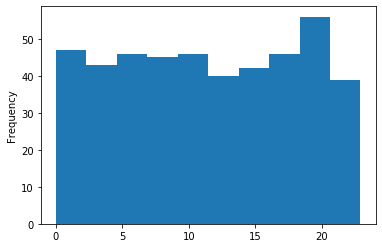

In [504]:
# The Height distribution of the parameters
data["Height"].plot.hist()

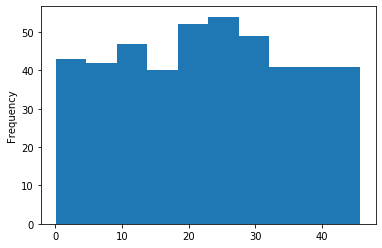

In [505]:
# The Diameter distribution of the parameters
data["Diameter"].plot.hist()

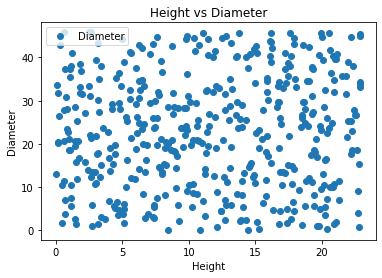

In [506]:
data.plot(x="Height", y="Diameter", style="o")
plt.title("Height vs Diameter")
plt.xlabel("Height")
plt.ylabel("Diameter")
plt.show()

In [507]:
# Declaring Dependent and Independent Variables
X = data["Height"].values.reshape(-1, 1)
y = data["Diameter"].values.reshape(-1, 1)

In [508]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [509]:
# Fit Data into our model
# model = LinearRegression()
# model.fit(X_train, y_train)
# joblib.dump(model, "C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\height-diameter.joblib")
model = joblib.load("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\height-diameter.joblib")
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 21.466767424584788
Slope: 0.10267833418709733


In [510]:
# Make Prediction
predictions = model.predict(X_test)

In [511]:
# Compare the actual value and the predicted values
data_frame = pd.DataFrame({"Actual(x)": X_test.flatten(), "Actual(y)": y_test.flatten(), "Predicted(y)": predictions.flatten()})
data_frame

,Actual(x),Actual(y),Predicted(y)
0,17.686604,2.723447,23.282798
1,15.830319,7.897541,23.092198
2,15.796743,18.023670,23.088751
3,17.549619,21.813627,23.268733
4,2.194713,27.055545,21.692117
...,...,...,...
85,12.594174,20.803021,22.759916
86,22.923487,34.320501,23.820513
87,0.159893,20.314663,21.483185
88,6.852907,19.856327,22.170413


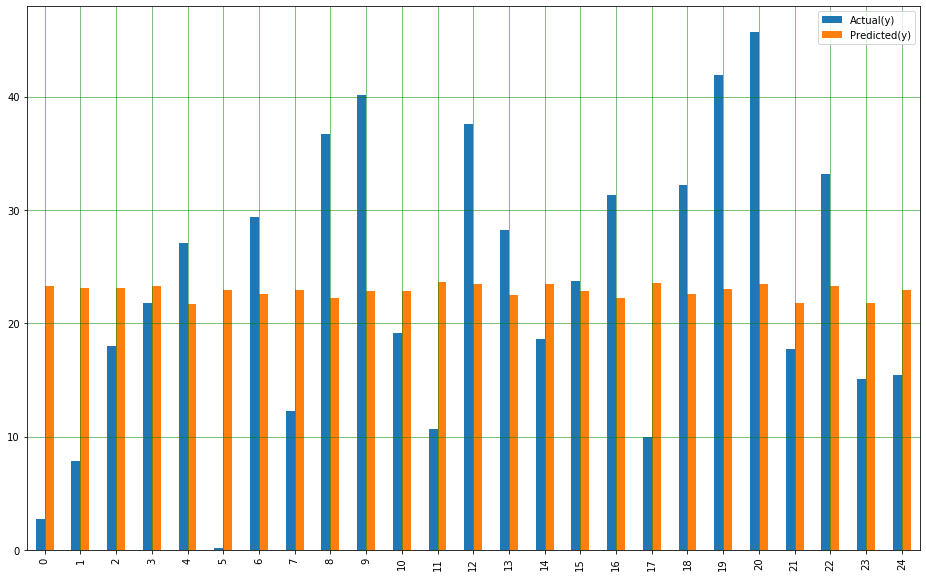

In [512]:
# Bar Graph
y_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "Predicted(y)": predictions.flatten()})
data_frame_graph = y_frame.head(25)
data_frame_graph.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

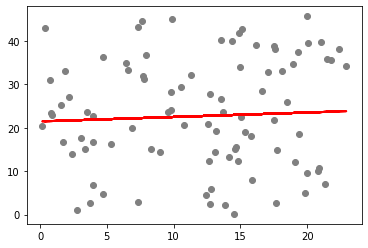

In [513]:
# A Straight Line Plot
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, predictions, color="red", linewidth=2)
plt.show()

In [514]:
# Errors
mean_absolute_error = mean_absolute_error(y_test, predictions)
mean_squared_error = mean_squared_error(y_test, predictions)
root_mean_squared_error = np.sqrt(mean_squared_error)
r2_score = model.score(X_train, y_train)
print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"Mean Squared Error: {mean_squared_error}")
print(f"Root Mean Squared Error: {root_mean_squared_error}")
print(f"r^2 Score: {r2_score} -- ({r2_score * 100})%")

Mean Absolute Error: 10.76205518425184
Mean Squared Error: 158.16089408410457
Root Mean Squared Error: 12.57620348452205
r^2 Score: 0.0028348693460952257 -- (0.28348693460952257)%


In [515]:
# Make Predictions Manually
# regression_model = LinearRegression()
# regression_model.fit(X, y)
regression_model = joblib.load("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\manual-height-diameter.joblib")
X_predict = [[14.543234]]
y_predict = regression_model.predict(X_predict)
predicted_value = y_predict[0][0]
print(f"Predicted Diameter(y): {predicted_value}")

Predicted Diameter(y): 23.14248900665183


In [516]:
# Generate Manual Values
manual_data = data
manual_data

,S/N,Height,Diameter
0,1,16.199683,43.514815
1,2,20.832644,9.981329
2,3,0.488141,10.561674
3,4,22.710793,3.966893
4,5,7.883484,39.131736
...,...,...,...
445,446,4.429514,19.794388
446,447,18.507230,26.041475
447,448,17.587551,45.647190
448,449,11.075819,6.794715


In [517]:
# Extract table values into array
parameter_data = []

s_n = []
manual_s_n = data["S/N"].values.reshape(-1, 1)
for item in manual_s_n:
    position = 0
    s_n.append(item[position])
    position += 1

height = []
manual_height = data["Height"].values.reshape(-1, 1)
for item in manual_height:
    position = 0
    height.append(item[position])
    position += 1

diameter = []
manual_diameter = data["Diameter"].values.reshape(-1, 1)
for item in manual_diameter:
    position = 0
    diameter.append(item[position])
    position += 1

for position in range(449):
    data = [s_n[position], height[position], diameter[position]]
    parameter_data.append(data)

print(parameter_data)

[[1, 16.19968287, 43.514814799999996], [2, 20.83264385, 9.981328836], [3, 0.488141204, 10.56167428], [4, 22.71079297, 3.9668930760000003], [5, 7.8834841110000005, 39.13173601], [6, 10.58503663, 8.313417367000001], [7, 3.997367183, 6.735644381], [8, 20.57210104, 45.63567819], [9, 4.568331015, 6.560633934], [10, 22.77492543, 9.151818183], [11, 11.30824107, 32.23326853], [12, 5.098710189, 38.84630313], [13, 10.570542199999998, 29.42683548], [14, 1.786846845, 31.65983459], [15, 2.6536634969999997, 12.31954399], [16, 14.98773076, 34.03807509], [17, 19.26155786, 31.10108861], [18, 8.017870103, 13.58870579], [19, 1.607263729, 11.85702232], [20, 7.956013905, 13.08583591], [21, 20.621859699999998, 41.72963018], [22, 13.68723095, 23.70062496], [23, 17.70566774, 40.44621563], [24, 10.75257214, 42.81066187], [25, 11.06785078, 45.65434492], [26, 15.8660563, 35.23248385], [27, 11.47382563, 19.44083808], [28, 11.94007768, 26.23688286], [29, 22.8654612, 45.49722768], [30, 5.245633764, 26.28390162], [3

In [518]:
# Generate samples
no_of_sample = 50
list_of_samples = []

for count in range(180):
    number = randrange(450)
    present = False
    if len(list_of_samples) == 0:
        list_of_samples.append(number)
    for sample in list_of_samples:
        if sample == number:
            present = True
    if not present and len(list_of_samples) < no_of_sample:
        list_of_samples.append(number)
        present = False

In [519]:
# Based on the random numbers generate our random array
sample_list = []
for sample in list_of_samples:
    for parameter in parameter_data:
        if parameter[0] == sample:
            sample_list.append(parameter_data[sample - 1])

print(f"Sample List of {len(sample_list)} samples")
print(sample_list)

Sample List of 50 samples
[[325, 15.97632479, 30.10107263], [128, 2.47893915, 45.82987413], [257, 8.414561673, 0.096828667], [158, 20.90591195, 10.64477694], [297, 11.54185245, 24.12425059], [3, 0.488141204, 10.56167428], [305, 7.636746909, 7.492885205], [275, 3.550762696, 23.67125313], [333, 4.743398945, 4.690976496], [76, 22.82762204, 0.758305232], [366, 19.98073668, 45.68298248], [176, 12.59417409, 20.80302123], [309, 19.4527581, 8.08753249], [328, 14.00884622, 11.46037757], [286, 8.146018769, 15.30510816], [212, 16.36880015, 4.73194584], [119, 7.753829077000001, 31.33539873], [234, 1.049227781, 18.50428971], [247, 19.24555339, 37.89904038], [320, 15.05326234, 22.56606243], [122, 10.64337498, 20.83092402], [300, 15.31363243, 23.30270667], [346, 1.72936963, 16.7602569], [91, 9.853186888, 45.00582725], [22, 13.68723095, 23.70062496], [432, 6.26183338, 42.8287076], [282, 17.58964877, 38.037840100000004], [100, 10.13864066, 19.63189033], [373, 17.77024618, 10.78227035], [408, 9.19880855

In [520]:
# Seperate our height(x) and diameter(y) values
height_x = []
diameter_y = []

for item in sample_list:
    height_x.append(item[1])
    diameter_y.append(item[2])
                           
print("List of height(x) samples")
print(height_x)
print()                         
print("List of diameter(y) samples")
print(diameter_y)

List of height(x) samples
[15.97632479, 2.47893915, 8.414561673, 20.90591195, 11.54185245, 0.488141204, 7.636746909, 3.550762696, 4.743398945, 22.82762204, 19.98073668, 12.59417409, 19.4527581, 14.00884622, 8.146018769, 16.36880015, 7.753829077000001, 1.049227781, 19.24555339, 15.05326234, 10.64337498, 15.31363243, 1.72936963, 9.853186888, 13.68723095, 6.26183338, 17.58964877, 10.13864066, 17.77024618, 9.198808556, 6.510095205, 7.636045654, 18.77052061, 11.94078214, 3.19708096, 15.02081683, 13.91808336, 22.44944109, 5.654797906000001, 20.83264385, 4.52705515, 6.247224017000001, 11.07581861, 4.832744421, 8.017870103, 4.0015306289999995, 11.37025227, 19.04019756, 17.30546696, 8.95739845]

List of diameter(y) samples
[30.10107263, 45.82987413, 0.096828667, 10.64477694, 24.12425059, 10.56167428, 7.492885205, 23.67125313, 4.690976496, 0.758305232, 45.68298248, 20.80302123, 8.08753249, 11.46037757, 15.30510816, 4.73194584, 31.33539873, 18.50428971, 37.89904038, 22.56606243, 20.83092402, 23.3

In [521]:
# Summation of x and y values
sum_of_x = 0
sum_of_y = 0
sum_of_xy = 0

for x in height_x:
    sum_of_x += x

for y in diameter_y:
    sum_of_y += y
    
for xy in sample_list:
    sum_of_xy += xy[1] * xy[2]

print(f"Sum of X values: {sum_of_x}")
print(f"Sum of Y values: {sum_of_y}")
print(f"Sum of XY values: {sum_of_xy}")

Sum of X values: 565.7093066030002
Sum of Y values: 1107.0443623379997
Sum of XY values: 12371.069139907915


In [522]:
# Summation of the squares of x and y values
sum_of_x_squares = 0
sum_of_y_squares = 0

for x in height_x:
    x2 = x * x
    sum_of_x_squares += x2

for y in diameter_y:
    y2 = y * y
    sum_of_y_squares += y2

print(f"Sum of X Squares values: {sum_of_x_squares}")
print(f"Sum of Y Squares values: {sum_of_y_squares}")

Sum of X Squares values: 8281.737890710336
Sum of Y Squares values: 33295.10239120493
